[View in Colaboratory](https://colab.research.google.com/github/ahmagalhaes/IIC/blob/master/Copy_of_Exerc%C3%ADcio_Computacional_III_Clustering_(3).ipynb)

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec
from matplotlib import cm
from IPython import display
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.cluster import MiniBatchKMeans
import scipy.spatial.distance
from sklearn.utils import shuffle
from sklearn.metrics import pairwise_distances_argmin
from time import time

## Exercício 1

Implemente o algoritmo k-means, como visto em sala de aula.

O algoritmo recebe como argumentos:

* a matriz de observações $X$ de dimensão $n \times d$, em que $n$ corresponde ao número de observações e $d$ a dimensão de cada observação;
* o número de grupos a serem estimados, $k$;
* um limiar $\epsilon$ utilizado no critério de parada do algoritmo (utilize o valor *default*);
* um número máximo de iterações, *max_iter*, para garantir que o algoritmo pare, caso o critério de parada não seja atingido


In [0]:
def kmeans(X, k, epsilon = 1e-8, max_iter = 50):#50
    n,d = X.shape 
    
        
    
    # PASSO 1 - Escolha k centros a partir de padrões aleatórios e armazene na matriz
    # center, de dimensoes kxd
    #np.random.seed(1)
    #center = X[np.random.permutation(n)[0:k],:] #<SEU CODIGO AQUI>
    center = X[np.random.choice(np.arange(len(X)), k), :]   
    # Matriz de distancias de dimensao nxk
    dist = np.zeros((n,k))    
    plt.figure(figsize=(15,5))
    if (d==2):
      gs = gridspec.GridSpec(1,2)
    oldJ = 0    
    iteration = 0
    j_vec = np.zeros(max_iter+1)
    while (iteration < max_iter):        
        # PASSO 2 - Associe cada amostra ao grupo mais próximo
        # - Calcula a distância entre as amostras e os centros dos grupos e armazena na matriz dist
        #<SEU CODIGO AQUI>
        dist=scipy.spatial.distance.cdist(X, center, metric='euclidean')
        # - Encontra o centro de grupo mais próximo de cada amostra e armazena no vetor group_idx de tamanho n
        group_idx =np.argmin(dist,axis=1) #<SEU CODIGO AQUI>
        
        # PASSO 3 - Recalcule os centros dos grupos a partir do novo partcionamento
        #  das amostras e armazene o resultado na  matriz center
        # <SEU CODIGO AQUI> 
        for i in range(k):
             center[i,:]=(X[group_idx==i,:]).mean(axis=0)          
        # PASSO 4 - Pare se o critério de convergência foi atingido, caso contrário 
        # vá para o Passo 2
        # - Calcula a função objetivo e armazene no escalar J
        # <SEU CODIGO AQUI>
        J=0
        for i in range(k):
             J=J+np.mean(scipy.spatial.distance.cdist(X[group_idx==i], X[group_idx==i], metric='euclidean')) #/np.size(X[group_idx==i])
        j_vec[iteration] = J                        
        ## PLOTA OS RESULTADOS PARCIAIS        
        if (d==2):        
          plt.subplot(gs[0])
          plt.cla()
          plt.scatter(X[:,0],X[:,1], c=group_idx+1)
          plt.plot(center[:,0],center[:,1], 'r<', markersize=10)
          plt.title('Iteration: %d'%(iteration))     
          plt.subplot(gs[1])
          
        plt.cla()
        plt.plot(j_vec[:iteration])
        plt.title('Iteration: %d - J = %.4f'%(iteration,J))
        display.clear_output(wait=True)
        display.display(plt.gcf())                           
        # - Checa se a variação na função objetivo foi significativa
        if (np.linalg.norm(J-oldJ) <= epsilon):
            break;       
        oldJ = J
        iteration = iteration + 1   
    display.clear_output(wait=True)
    return center, group_idx, J
  
  
  

Valide seu algoritmo com o código abaixo.

Veja que o *k-means* nem sempre converge para um ponto de mínimo global da função a ser otimizada, ou seja, em algumas
execuções os grupos encontrados não são ótimos.

Descreva uma possível solução para resolver este problema.

Resposta:

Uma possível solução para o problema é executar o algoritmos várias vezes, selecionando, randômicamente, os pontos centroids iniciais. A cada iteração, calcular a função de custo. Selecionar a distribuiçãi de agrupamentos que obtiver a menor função de custo.


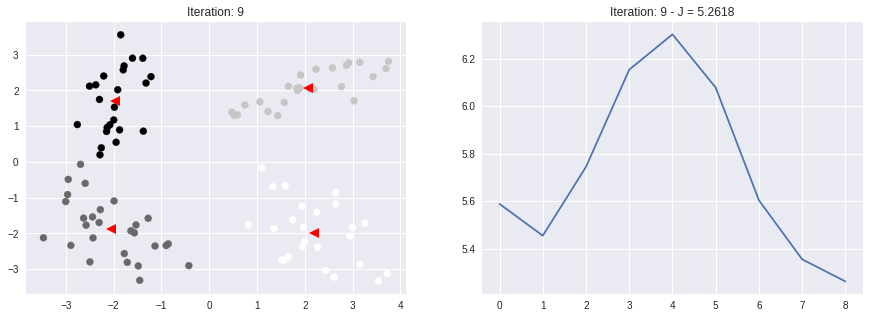

In [3]:
X,_ = make_classification(n_samples= 100, n_features=2, n_classes = 4, n_clusters_per_class=1, 
                          n_informative=2, n_redundant=0, n_repeated=0,
                         class_sep = 2)
centers, gi, J = kmeans(X,k=4)







## Exercício 2

Nesse exercício iremos realizar uma quantização das cores (https://en.wikipedia.org/wiki/Color_quantization) de uma imagem utilizando agrupamento.

Dado uma imagem representada como uma combinação de 256 possíveis valores de intensidade para vermelho, verde e e azul (RGB), iremos
reduzir o número cores para representar a imagem utilizando o algoritmo *k-means*. O número de cores resultantes será igual ao número de grupos a serem encontrados $k$.

Para isso você deve realizar os seguintes passos:

1. Ler as matrizes de cores vermelho, verde e azul (RGB) da imagem de entrada. O conteúdo da imagem será armazenado em uma matriz *I* de dimensões $w\times h \times 3$, onde 3 corresponde aos três canais de cor e $w$ e $h$ às dimensões horizontais e verticais da imagem (necessário para utilizar a função *plt.imshow*)
2. Converter os valores de cada canal de cor originalmente na faixa [0,255] para [0,1]
3. Converter a matriz $I$  em uma matriz $X$ de dimensões $wh \times 3$. Cada linha dessa matriz corresponde aos valores vermelho, verde e azul de cada pixel da imagem (dica: utilize a funçao np.reshape)
4. Realizar o agrupamento dos dados a partir da matriz $X$, obtendo os centros e o índice do grupo para cada pixel
5. Converter a matriz $X$ em uma matriz $V$ de dimensões $3 \times w \times h$. Essa matriz tem as mesmas dimensões da matriz $I$, porém o valor original RGB de cada pixel deve ser substituído pelo valor RGB do centro do grupo correspondente

done in 394.286s.


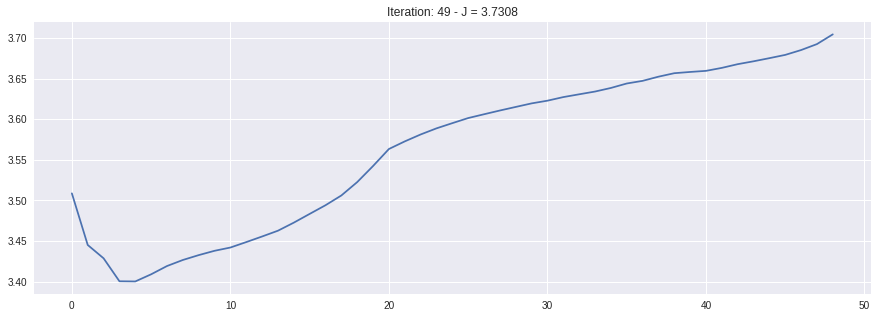

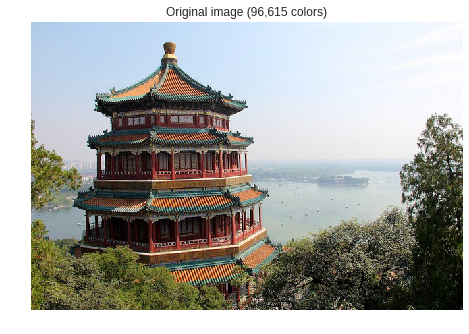

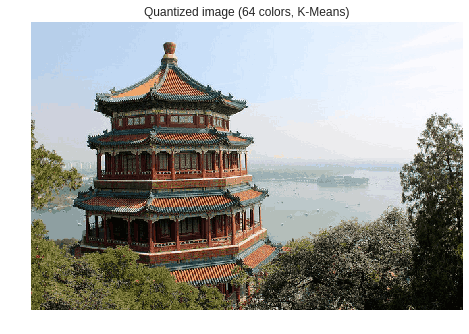

In [4]:
k = 64

def Compress_image(centroids, labels, w, h):
    d = centroids.shape[1]
    image = np.zeros((w, h, d))
    idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = centroids[labels[idx]]
            idx += 1
    return image
# Passo 1 - Carrega a imagem original
I = load_sample_image("china.jpg")
# Passo 2 - Converter os valores para [0,1]
I = np.array(I, dtype=np.float64) / 255
# Passo 3 - Converter I em X (utilize a função np.reshape)
#<SEU CODIGO AQUI>
w,h,c=I.shape
X_img=np.reshape(I,(w*h,c))
# Passo 4 - Realizar o agrupamento dos dados utilizando o algoritmo k-means
#<SEU CODIGO AQUI>
t0 = time()
centers_img, gi_img, J_img = kmeans(X_img,k, max_iter=50)
t1 = time()
# Passo 5 - Converter X em V substituindo os valores RGB originais de cada pixel pelo valor RGB do centro correspondente
#<SEU CODIGO AQUI>
V=Compress_image(centers_img, gi_img, w, h)
plt.figure(2)
#plt.figure(figsize=(8,3))
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(I)
plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (%d colors, K-Means)'% k)
plt.imshow(V)
print("done in %0.3fs." % (t1 - t0))



## Exercício 3

A solução implementada resolve o problema, porém tem uma alta complexidade computacional. 

A biblioteca *scikit-learn* possui uma implementação do algoritmo *k-means* otimizada (http://scikit-learn.org/stable/modules/clustering.html#k-means). Um exemplo de otimização é 
a utilização do algoritmo *k-means++* para inicializar os centros dos grupos.

Refaça o exercício anterior utilizando a implementação da biblioteca *scikit-learn* e avalie se existe algum ganho de desempenho.



RESPOSTA Á QUESTÃO


Utilizando a biblioteca scikit-learn o ganho de desempenho foi muito significativo. O tempo de execução foi muito menor. Usando a minha implementação, obtive um tempo de 394.3 segundos, enquando o scikitlearnn o tempo foi de somente 0.0007 segundo.

done in 0.00007s.


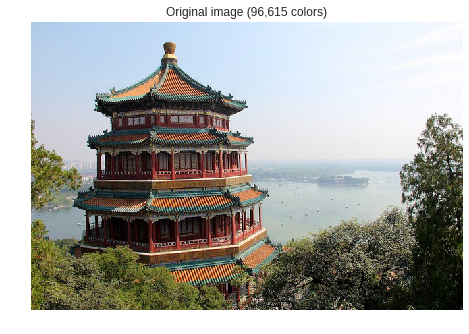

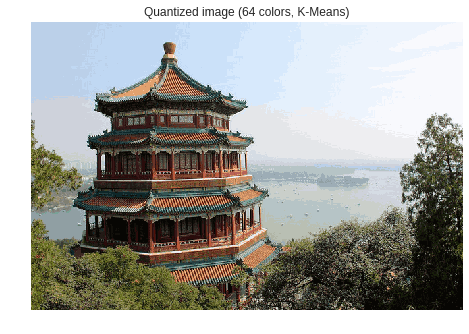

In [5]:
k = 64
  
# Passo 1 - Carrega a imagem original
I = load_sample_image("china.jpg")
# Passo 2 - Converter os valores para [0,1]
I = np.array(I, dtype=np.float64) / 255
# Passo 3 - Converter I em X (utilize a função np.reshape)
#<SEU CODIGO AQUI>
w,h,c=I.shape
X_img=np.reshape(I,(w*h,c))
# Passo 4 - Realizar o agrupamento dos dados utilizando o algoritmo k-means da biblioteca scikit-learn
t0 = time()
model = KMeans(n_clusters=k, verbose=0, max_iter=50)
t1 = time()
#<SEU CODIGO AQUI>
X_img_sample = shuffle(X_img, random_state=0)[:1000]
model.fit(X_img_sample)
labels=model.predict(X_img)

# Passo 5 - Converter X em V substituindo os valores RGB originais de cada pixel pelo valor RGB do centro correspondente
#<SEU CODIGO AQUI>
# função criada no exercicio 2
V=Compress_image(model.cluster_centers_, labels, w, h)
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(I)
plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (%d colors, K-Means)'% k)
plt.imshow(V)
print("done in %0.5fs." % (t1 - t0))

## Exercício 4

A biblioteca *scikit-learn* também possui uma variação do algoritmo *k-means* denominada *Mini Batch k-means* que reduz significativamente
o custo computacinal do algoritmo original (http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans). 
O princípio dete algoritmo é similar ao algoritmo *mini-batch gradient descent*.

Leia o artigo abaixo descreva com suas palavras os princípios desse algoritmo.

RESPOSTA A QUESTÃO.

O minibatchKmeans é baseado na subamostragem aleatória do conjunto de dados de entrada. A cada iteração do algoritmo, um subconjunto é amostrado, de forma aleatória, dos dados de entrada, ou seja, somente uma parte dos dados é usada para treinar o algoritmo. Por ter um conjunto menor de dados, o algoritmo requer menor esforço computacional, resultando em maior eficiência (tempo de execução menor). A qualidade do resultado é um pouco menor se comparado ao algoritmo Kmeans.
O algoritmo é executado em dois passos. No primeiro passo um conjunto de amostras é obtido, aleatoriamente, do conjunto de dados original. Este conjunto de dados é associado ao centroide mais próximo. No próximo passo, a posição dos centroids é recalculada. O centroid associado a cada amostra do subconjunto é definido com base na média da amostras do subconjunto e com base nas amostras previamente alocadas ao centroide, diminuindo a taxa de mudança de posição dos centroides. Estes passos são repetidos até que  a mudança dos centroidees não seja significativa ou até alcançar um número máximo de iterações.



Em seguida, refaça o exercício 2 utilizando este algoritmo.


done in 0.00008s.


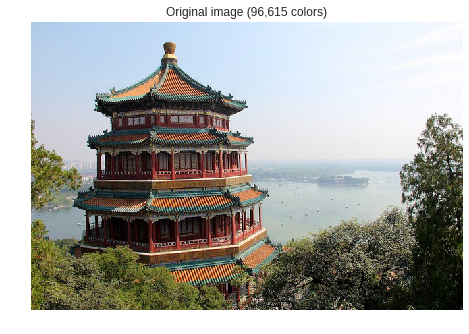

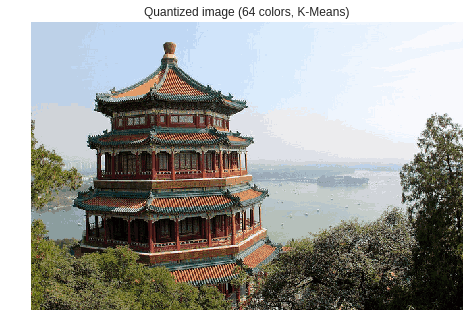

In [6]:

from sklearn.datasets import load_sample_image

k = 64
  
# Passo 1 - Carrega a imagem original
I = load_sample_image("china.jpg")
# Passo 2 - Converter os valores para [0,1]
I = np.array(I, dtype=np.float64) / 255
# Passo 3 - Converter I em X (utilize a função np.reshape)
#<SEU CODIGO AQUI>
w,h,c=I.shape
X_img=np.reshape(I,(w*h,c))
# Passo 4 - Realizar o agrupamento dos dados utilizando o algoritmo k-means da biblioteca scikit-learn
t0 = time()
model = MiniBatchKMeans(n_clusters=k, verbose=0, max_iter=50)
t1 = time()
#<SEU CODIGO AQUI>
X_img_sample = shuffle(X_img, random_state=0)[:1000]

model.fit(X_img_sample)
labels=model.predict(X_img)

# Passo 5 - Converter X em V substituindo os valores RGB originais de cada pixel pelo valor RGB do centro correspondente
#<SEU CODIGO AQUI>
# função criada no exercicio 2
V=Compress_image(model.cluster_centers_, labels, w, h)
plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(I)

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (%d colors, K-Means)'% k)
plt.imshow(V)
print("done in %0.5fs." % (t1 - t0))